##Project Background

“Walmart is an American multinational retail corporation that operates a chain of
hypermarkets, discount department stores, and grocery stores” (Wikipedia). The company has
45 stores across the United States. Every year the company runs several promotional
markdown events before prominent holidays like Super Bowl, Labor Day, Thanksgiving, and
Christmas to increase sales.

##Problem Statement

This project studies Walmart’s historical sales data for 45 stores in the United States to
assist Walmart’s management team in the decision-making process by:
• Performing exploratory data analysis and time series analysis of Walmart’s sales data
• Identifying the factors that impact sales
• Developing time series models to forecast Walmart’s future sales

#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

import pickle 
from os import path

from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
features = pd.read_csv('/content/drive/MyDrive/Final Project/datasets/features.csv')
data = pd.read_csv("/content/drive/MyDrive/Final Project/datasets/train.csv")
stores = pd.read_csv("/content/drive/MyDrive/Final Project/datasets/stores.csv")
test = pd.read_csv("/content/drive/MyDrive/Final Project/datasets/testMerged.csv")

#train.csv (data)
This file contains 421,570 Walmart’s historical sales records from February 5th, 2010 to November 1st, 2012 and includes the following fields:

Store – the store number

Dept – the department number

Date – last day of the week

Weekly_Sales

▪ Weekly sales for the given department in the given store

▪ Negative if returns exceed sales

▪ Positive if sales exceed returns

IsHoliday – True if special holiday falls within the week; otherwise, False

In [ ]:
#Checking number of rows and columns for data dataframe
data.shape

(421570, 5)

In [ ]:
#Checking first 5 rows in data dataframe
data.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [ ]:
#Checking column names, not null values in columns and its datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
#Checking number of rows and columns for stores dataframe
stores.shape

(45, 3)

In [ ]:
#Checking first 5 rows in features dataframe
stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [ ]:
#Checking column names, not null values in columns and its datatypes
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


#features.csv
This file contains 8,190 records related to the store, department, and regional activity for the given dates and includes the following fields:

 Store – the store number

 Date – last day of the week

Temperature – average temperature in the region in Fahrenheit

Fuel_Price – weekly average fuel price (USD)

MarkDown1-5 – anonymized data related to promotional markdowns that Walmart
is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time.

CPI – consumer price index

Unemployment – weekly average unemployment rate

IsHoliday – True if holiday falls within the week. False if holiday does not fall within the week.

In [ ]:
#Checking number of rows and columns for features dataframe
features.shape

(8190, 12)

In [ ]:
#Checking first 5 rows in features dataframe
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [ ]:
#Checking column names, not null values in columns and its datatypes
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


#Handling missing values of features dataset

In [ ]:
#null values from CPI,Unemployment are replaced with median

features["CPI"].fillna(features["CPI"].median(),inplace=True)
features["Unemployment"].fillna(features["Unemployment"].median(),inplace=True)

In [ ]:
#we are looping through all the markdowns and replacing negative values with 0.
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  features["MarkDown"+str(i)].fillna(value=0,inplace=True)

In [ ]:
#rechecking null values in columns after replacing null values 
features.isna().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

#Merging Training Dataset and merged stores-features Dataset

In [ ]:
#mergiging two dataframes i.e data and stores, on Store column 
data = pd.merge(data,stores,on='Store',how='left')

In [ ]:
#mergiging two dataframes i.e data and features, on Store and Date column 
data = pd.merge(data,features,on=['Store','Date'],how='left')

In [ ]:
#chaning datatype of Date from string to datetime64
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
#sorting the data dataframe by Date's
data.sort_values(by=['Date'],inplace=True)

In [ ]:
#setting Date as index to data dataframe
data.set_index(data.Date, inplace=True)

In [ ]:
#after merging data and features, we got two IsHoliday columns so, here we are checking if both the columns ahve same values
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()

True

In [ ]:
#droping IsHoliday after murging as its coming twice and renameing column name
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
data.info()
     

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  I

In [ ]:
#checking first 5 rows after merging all the dataframes
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False


#Splitting Date Column

In [ ]:
#Splitting Date Column to year, month and week
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.week

<ipython-input-15-673715e060d3>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Date'].dt.week


In [ ]:
##checking first 5 rows after merging all the dataframes and creating new columns from date
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5


#Outlier Detection

In [ ]:
#creating statestical summery after grouping by store and Dept 
agg_data = data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       37
dtype: int64

In [ ]:
#adding above sales aggrigation df to main df i.e. data 
store_data = pd.merge(left=data,right=agg_data,on=['Store', 'Dept'],how ='left')
store_data.dropna(inplace=True)
data = store_data.copy()
del store_data

In [ ]:
#chaning datatype of Date and sort by Date and resetting the index
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()
     

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,0.0,0.0,...,6.299,False,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095


In [ ]:
#as values in  MarkDown are missing , we will club it all together and make one column out of it
data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

In [ ]:
#listing down the numaric columns
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = data[numeric_col].copy()

In [ ]:
#checking shape of final dataframe we created
data.shape

(421533, 20)

In [ ]:

data = data[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]
data.shape
     

(375438, 20)

#Negative Weekly Sales

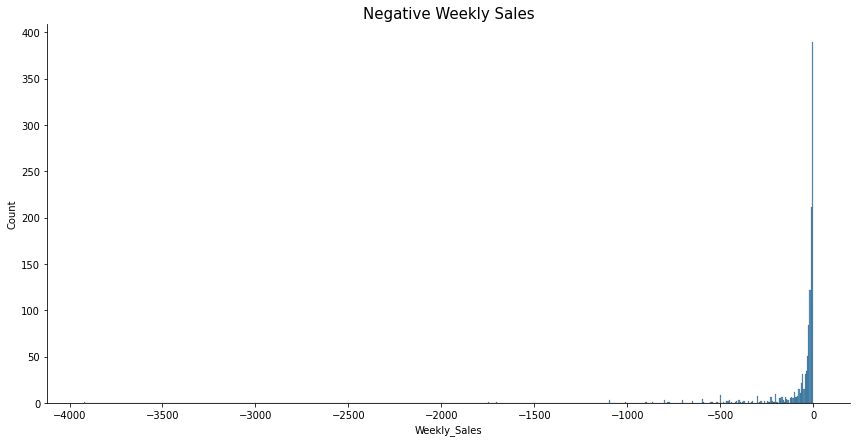

In [ ]:
#checking for negative sales
y = data["Weekly_Sales"][data.Weekly_Sales < 0]
sns.displot(y,height=6,aspect=2)
plt.title("Negative Weekly Sales", fontsize=15)
plt.show()
     

In [ ]:
#filtering the positive sales data
data=data[data['Weekly_Sales']>=0]


In [ ]:
#Checking for number of rows we are left with after filteration
data.shape

(374247, 20)

In [ ]:
#changing datatype of 'IsHoliday'
data['IsHoliday'] = data['IsHoliday'].astype('int')

In [ ]:
#checking for first rows after data transformations
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.480,9854.349032,0.00
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,766.93,-9.92,372.655556,371.050,290.954675,0.00
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,2512.14,110.56,876.629441,824.040,307.436056,0.00
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,11990.43,7414.43,9188.915105,9161.970,756.223236,0.00
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,29166.26,4791.74,8607.050490,7571.600,3874.176095,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,2,26,2012-10-26,9258.88,A,202307,69.79,3.506,223.078337,6.170,0,2012,10,43,19679.04,4179.99,9347.725105,8762.990,2825.107609,9678.80
2012-10-26,38,23,2012-10-26,53.12,C,39690,65.95,4.301,131.193097,10.199,0,2012,10,43,289.78,3.50,37.848679,31.365,34.065601,502.88
2012-10-26,27,6,2012-10-26,5339.65,A,204184,58.99,4.071,142.762411,8.000,0,2012,10,43,41005.33,2524.01,7730.729091,6798.780,5178.928257,10969.27


In [ ]:
#storing clean data to drive
data.to_csv('/content/drive/MyDrive/Final Project/Out1/weekly_sales_1.csv')

#Data Visuallizations

##Average Monthly Sales

FileNotFoundError: ignored

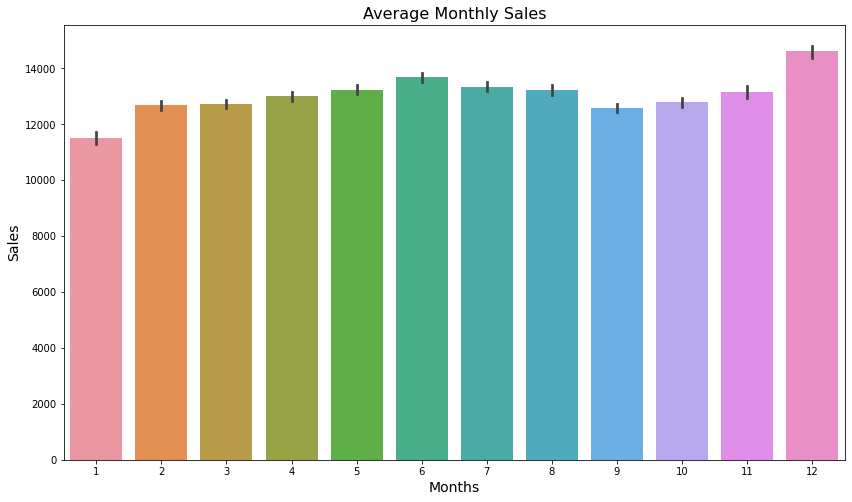

In [ ]:
#visuallizing avd sales per month
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)

plt.grid()

##Monthly Sales for Each Year

In [ ]:
#This method is used to compute a simple cross-tabulation of two (year and month) factors.computes a frequency table of the factors by weekly_sales values and an aggregation sum function.
data_monthly = pd.crosstab(data["Year"], data["Month"], values=data["Weekly_Sales"],aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.365986e+08,1.369976e+08,1.753251e+08,1.422677e+08,1.455770e+08,1.776954e+08,1.426176e+08,1.344151e+08,1.687452e+08,1.440445e+08,1.927286e+08
2011,1.170809e+08,1.320987e+08,1.341586e+08,1.710181e+08,1.382097e+08,1.441182e+08,1.762046e+08,1.398143e+08,1.668033e+08,1.375280e+08,1.034907e+08,1.597524e+08
2012,1.172222e+08,8.915290e+07,1.734250e+08,1.479222e+08,1.512280e+08,1.902330e+08,1.458221e+08,1.636039e+08,1.432228e+08,1.480537e+08,NaN,NaN


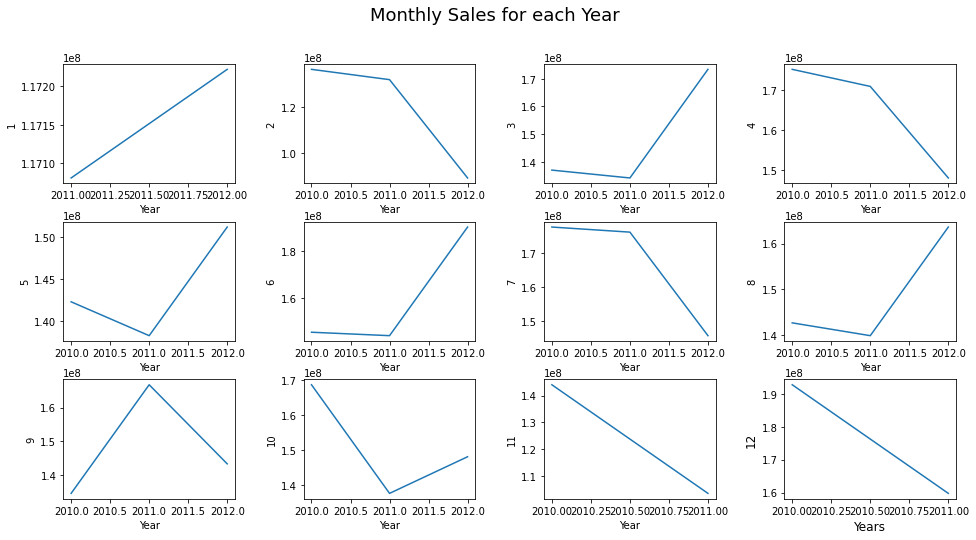

In [ ]:
#monthly sales for each month
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1

plt.show()

#Average Weekly Sales Store wise

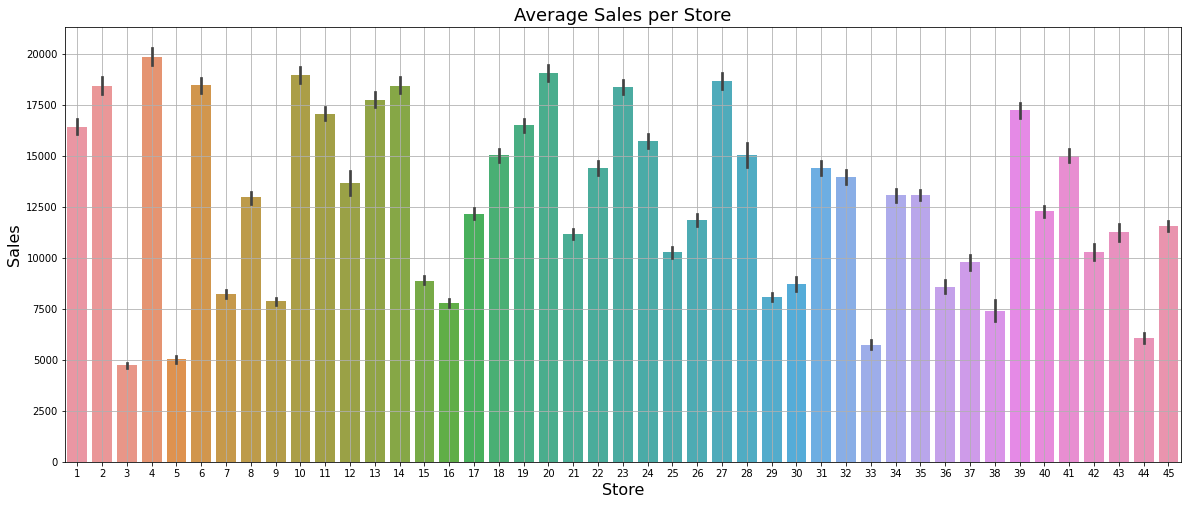

In [ ]:
#Average Weekly Sales per store

plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)

plt.show()

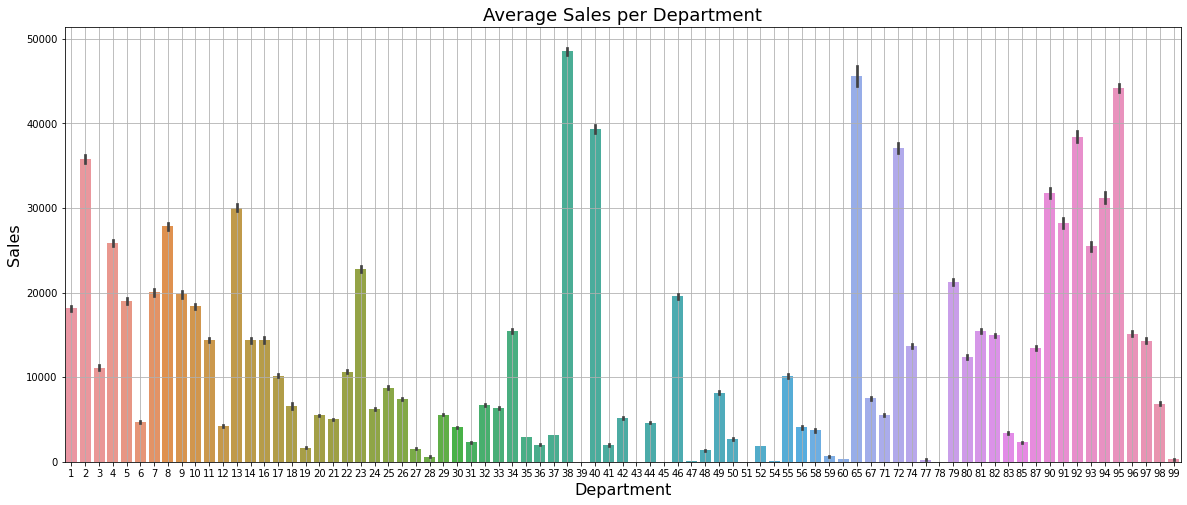

In [ ]:
#Average Sales by Department

plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)

plt.show()

#Sales Vs Temperature

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


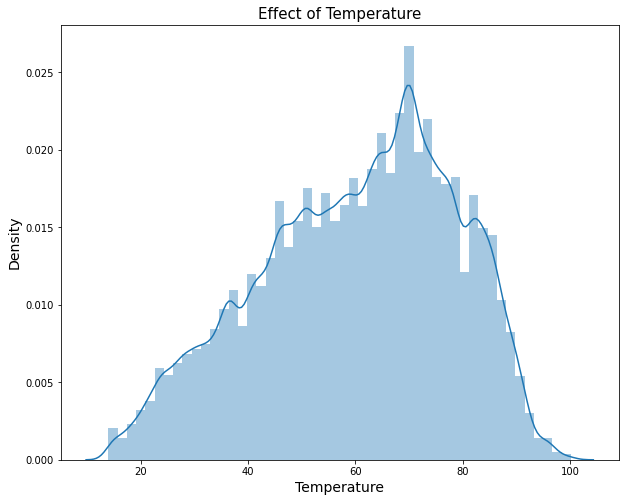

In [ ]:
#distribution plot for Temperature values
plt.figure(figsize=(10,8))
sns.distplot(data['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)

plt.show()

##Insight: distribution plot for Temperature values is seen to be normally distributed with mode at around 70 and values between 10 to 105

#Holiday Distribution

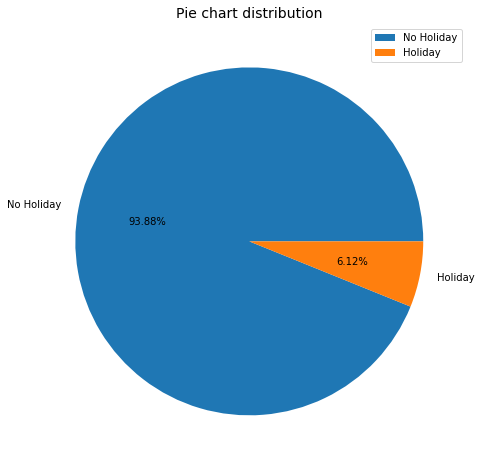

In [ ]:
#cheking weeks with holiday and weeks with no holiday
plt.figure(figsize=(8,8))
plt.pie(data['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Holiday distribution",fontsize=14)
plt.legend()

plt.show()

##Insight:
6.12% weeks are Holiday weeks

93.88% weeks are not holiday weeks

#Time Series Decompose

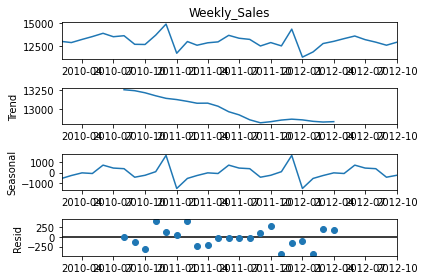

In [ ]:
sm.tsa.seasonal_decompose(data['Weekly_Sales'].resample('MS').mean(), model='additive').plot()

plt.show()

#Insight: grph shows trend and  sesonality in weekly sales values

#One-hot-encoding

One hot encoding is one method of converting data to prepare it for an algorithm and get a better prediction. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector.

We have done one-hot encoding by using get_dummies function of pandas library.
In our dataset, we applied one-hot encoding on following categorical columns:
1. Store
2. Department
3. Type

In [ ]:
cat_col = ['Store','Dept','Type']
data_cat = data[cat_col].copy()

In [ ]:
#checking values at end of dataframe
data_cat.tail()
     

,Store,Dept,Type
Date,,,
2012-10-26,2,26,A
2012-10-26,38,23,C
2012-10-26,27,6,A
2012-10-26,36,40,A
2012-10-26,45,98,B


In [ ]:
#creating dummy variables for categorical variables
data_cat = pd.get_dummies(data_cat,columns=cat_col)  #drop_first=True

In [ ]:
#checking dummy variables
data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#cheking shape of dataframe before merging with dummy variables
data.shape

(374247, 20)

In [ ]:
#adding dummy variables to dataframe
data = pd.concat([data, data_cat],axis=1)

In [ ]:
#cheking shape of dataframe after merging with dummy variables
data.shape

(374247, 149)

In [ ]:
#dropping columns whoes dummi variables are  added
data.drop(columns=cat_col,inplace=True)

In [ ]:
#as date is having all unique vales droping it as it wont contribute to predication
data.drop(columns=['Date'],inplace=True)

In [ ]:
#checking shape of dataframe created
data.shape

(374247, 145)

#Data Normalization

Data Normalization:

It is a scaling technique method in which data points are shifted and rescaled so that they end up in a range of 0 to 1. It is also known as min-max scaling.
We have normalized our dataset by using MinMaxScaler function from sklearn library on following 

columns:
1. Weekly_Sales
2. Size
3. Temperature
4. Fuel_Price
5. CPI
6. Unemployment
7. Total_MarkDown

In [ ]:
#Listing down columns which are having continues data
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std']

In [ ]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [ ]:
#checking data aftr appling min_max scaler
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,668.48,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,693.87,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,8654.60,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,11123.56,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#normalizing the data
data = normalization(data.copy(),num_col)

In [ ]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.342576,0.630267,0.328495,0.0501,0.840500,0.508787,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.009188,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,0.009537,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.118953,0.650636,0.233627,0.0501,0.873861,0.291286,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.152888,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0


#Correlation between features of dataset

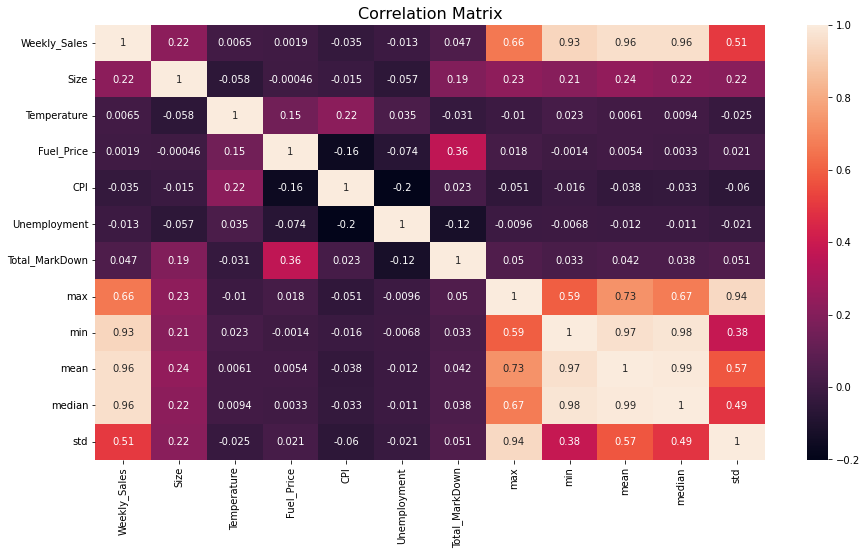

In [ ]:
#checking corrilation of columns with each other 

plt.figure(figsize=(15,8))
corr = data[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)

plt.show()

#Recursive Feature Elimination

In [ ]:
#listing down all the columns
feature_col = data.columns.difference(['Weekly_Sales'])
feature_col

Index(['CPI', 'Dept_1', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14',
       'Dept_16', 'Dept_17', 'Dept_18',
       ...
       'Type_B', 'Type_C', 'Unemployment', 'Week', 'Year', 'max', 'mean',
       'median', 'min', 'std'],
      dtype='object', length=144)

In [ ]:
#creating RandomForestRegressor model
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=23)
radm_clf.fit(data[feature_col], data['Weekly_Sales'])

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=23, oob_score=True)

In [ ]:
#listing down feteres with desecending order of its rank as per its importance
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])

for f in range(data[feature_col].shape[1]):
    feature_rank.loc[f] = [f+1,
                           data[feature_col].columns[indices[f]],
                           radm_clf.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,mean,5.746003e-01
1,2,median,3.534929e-01
2,3,Week,1.934967e-02
3,4,Temperature,8.887256e-03
4,5,max,5.867795e-03
...,...,...,...
139,140,Dept_51,2.305062e-10
140,141,Dept_45,1.851253e-10
141,142,Dept_78,6.003922e-12
142,143,Dept_39,1.743287e-13


##Insight:
with value 5.746003e-01 mean of weekly sales is most importatnt in our dataset

#Listing down top 22 important columns

In [ ]:
#top 22 important columns from our dataset
x=feature_rank.loc[0:22,['feature']]
x=x['feature'].tolist()
print(x)

['mean', 'median', 'Week', 'Temperature', 'max', 'CPI', 'Fuel_Price', 'min', 'std', 'Unemployment', 'Month', 'Total_MarkDown', 'Dept_16', 'Dept_18', 'Dept_3', 'IsHoliday', 'Size', 'Year', 'Dept_9', 'Dept_11', 'Dept_1', 'Dept_5', 'Dept_56']


In [ ]:
X = data[x]                #indipendent variable
Y = data['Weekly_Sales']   #dependent variabl

In [ ]:
#concatinating both 
data = pd.concat([X,Y],axis=1)

In [ ]:
#checking up the datset
data

,mean,median,Week,Temperature,max,CPI,Fuel_Price,min,std,Unemployment,...,Dept_3,IsHoliday,Size,Year,Dept_9,Dept_11,Dept_1,Dept_5,Dept_56,Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.208157,0.173215,5,0.328495,0.088635,0.840500,0.050100,0.253530,0.138276,0.508787,...,0,0,0.630267,2010,0,0,1,0,0,0.342576
2010-02-05,0.004499,0.004767,5,0.278565,0.001180,0.875680,0.050100,0.064648,0.004083,0.305248,...,0,0,0.492338,2010,0,0,0,0,0,0.009188
2010-02-05,0.009135,0.008968,5,0.278565,0.003866,0.875680,0.050100,0.066212,0.004314,0.305248,...,0,0,0.492338,2010,0,0,0,0,0,0.009537
2010-02-05,0.085594,0.086290,5,0.233627,0.018453,0.873861,0.050100,0.161046,0.010611,0.291286,...,0,0,0.650636,2010,0,0,0,0,0,0.118953
2010-02-05,0.080242,0.071542,5,0.278565,0.044887,0.875680,0.050100,0.126993,0.054362,0.305248,...,0,0,0.492338,2010,0,0,0,0,0,0.152888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,0.087055,0.082590,43,0.647585,0.030286,0.958935,0.518036,0.119050,0.039642,0.275758,...,0,0,0.906277,2012,0,0,0,0,0,0.127259
2012-10-26,0.001419,0.001617,43,0.602996,0.000446,0.050698,0.916333,0.064822,0.000478,0.760713,...,0,0,0.026063,2012,0,0,0,0,0,0.000730
2012-10-26,0.072181,0.064375,43,0.522178,0.063107,0.165055,0.801102,0.097548,0.072670,0.496028,...,0,0,0.916437,2012,0,0,0,0,0,0.073391


In [ ]:
#saving to drive
data.to_csv('/content/drive/MyDrive/Final Project/Out1/final_data_1.csv')

#Data Splitted into Training, Validation, Test
The main difference between training data and testing data is that training data is the subset of original data that is used to train the machine learning model, whereas testing data is used to check the accuracy of the model. The training dataset is generally larger in size compared to the testing
dataset.

In [ ]:
#dividing data into dependent and indipendent variable
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales

In [ ]:
#spliting data into train and test dataset with 20% data as test data and 80% on train data randomly
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

#Linear Regression Mode
Linear regression analysis is used to predict the value of a variable based on the value of another
variable. The variable you want to predict is called the dependent variable. The variable you are
using to predict the other variable's value is called the independent variable.

In [ ]:
#creating Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Y=mX+C

print(lr.coef_)
print(lr.intercept_)

In [ ]:
#Checking accuracy of Linear Regression model 
lr_acc = lr.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lr_acc)

Linear Regressor Accuracy -  92.28079698115758


##Insight: LinearRegression model is giving accuracy of 92.28%



In [ ]:
#predicting sales values using test dataset
y_pred = lr.predict(X_test)

In [ ]:
#calculating the Error values for the Linear Regression model with test data vs predicted value

print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.03005771492151418
MSE 0.0034851431916206573
RMSE 0.05903510135182845
R2 0.9228079866096734


#Insight:
In this linear regression model we got an accuracy is equal to 92.28%

Mean squared error is 0.00348

Mean absolute error is 0.0300

In [ ]:
#making dataframe out of actual data and predicted data
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_df.to_csv('/content/drive/MyDrive/Final Project/Out1/lr_real_pred.csv')
lr_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.132555
2010-07-09,0.364278,0.280242
2011-07-01,0.005003,0.026085
2012-01-06,0.015856,0.015369
2011-08-26,0.000318,0.002072
...,...,...
2011-01-28,0.169068,0.236392
2010-08-20,0.252860,0.235591
2010-11-26,0.265617,0.321839


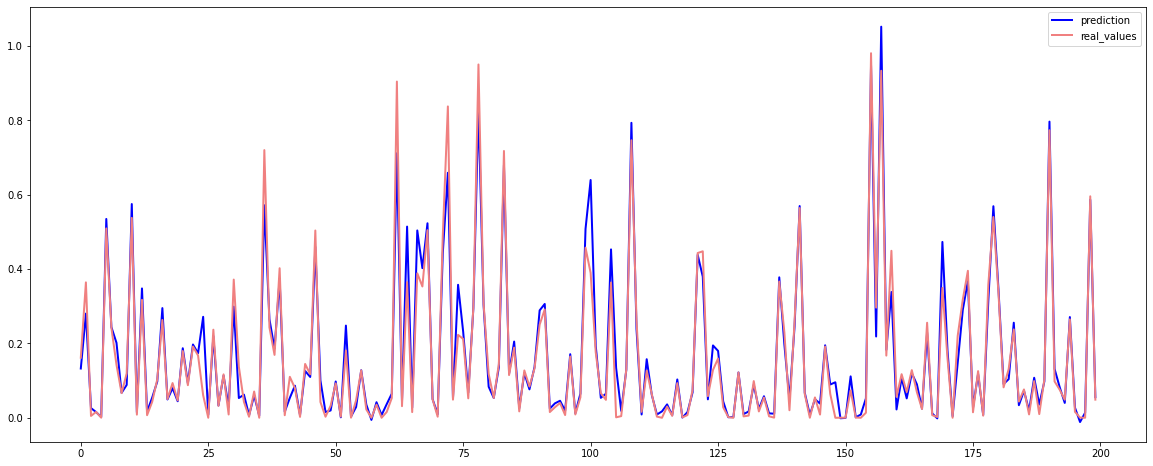

In [ ]:
#visuallizing actual data and predicted data
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")

plt.show()

#Random Forest Regressor Model
Random Forest Regression is a supervised learning algorithm that uses ensemble
learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

In [ ]:
#Creating Random Forest Regressor Model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
#Checking accuracy of Random Forest Regressor Model
rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  97.90888053375677


In [ ]:
#predicting sales values using test dataset

y_pred = rf.predict(X_test)

In [ ]:
#calculating the Error values for the Linear Regression model with test data vs predicted value

print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))
     

MAE 0.015497700214673305
MSE 0.0009441195875861165
RMSE 0.030726529052044205
R2 0.9790892409415295


#Insight:
In this model we got an accuracy is equal to 97.90%

Mean squared error is 0.000944

Mean absolute error is 0.015497

In [ ]:
#making dataframe out of actual data and predicted data

rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df.to_csv('/content/drive/MyDrive/Final Project/Out1/rf_real_pred.csv')
rf_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.124113
2010-07-09,0.364278,0.317673
2011-07-01,0.005003,0.013947
2012-01-06,0.015856,0.020317
2011-08-26,0.000318,0.000522
...,...,...
2011-01-28,0.169068,0.175894
2010-08-20,0.252860,0.263935
2010-11-26,0.265617,0.380948


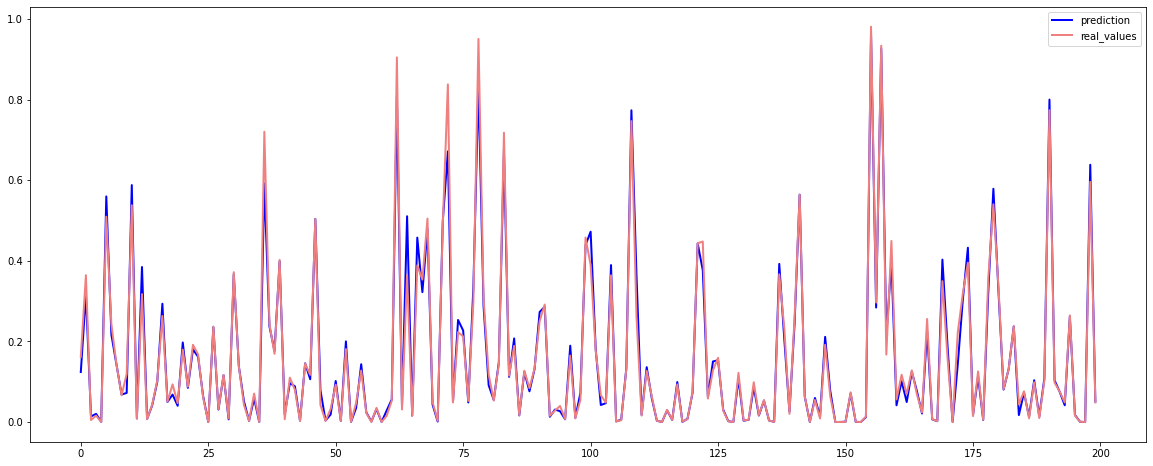

In [ ]:
#visuallizing actual data and predicted data

plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")

plt.show()
     

#K Neighbors Regressor Model
KNN regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood. The size of the neighbourhood needs to be set by the analyst or can be chosen using cross-validation (we will see this later) to select the size that
minimises the mean-squared error.

In [ ]:
#creating K Neighbors Regressor Model

knn = KNeighborsRegressor(n_neighbors = 3,weights = 'uniform')   #n_neighbors=K
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [ ]:
#Checking accuracy of K Neighbors Regressor Model
knn_acc = knn.score(X_test, y_test)*100
print("KNeigbhbors Regressor Accuracy - ",knn_acc)

KNeigbhbors Regressor Accuracy -  91.97260310713533


In [ ]:
#predicting sales values using test dataset

y_pred = knn.predict(X_test)

In [ ]:
#calculating the Error values for the Linear Regression model with test data vs predicted value

print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.03312215784495987
MSE 0.003624289652612284
RMSE 0.060202073490971085
R2 0.9199211027805663


#Insight:
In this model we got an accuracy is equal to 91.99%

Mean squared error is 0.0036242

Mean absolute error is 0.033122

In [ ]:
#making dataframe out of actual data and predicted data

knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_df.to_csv('/content/drive/MyDrive/Final Project/Out1/knn_real_pred.csv')
knn_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.112559
2010-07-09,0.364278,0.221307
2011-07-01,0.005003,0.011921
2012-01-06,0.015856,0.028551
2011-08-26,0.000318,0.001063
...,...,...
2011-01-28,0.169068,0.229475
2010-08-20,0.252860,0.262688
2010-11-26,0.265617,0.203904


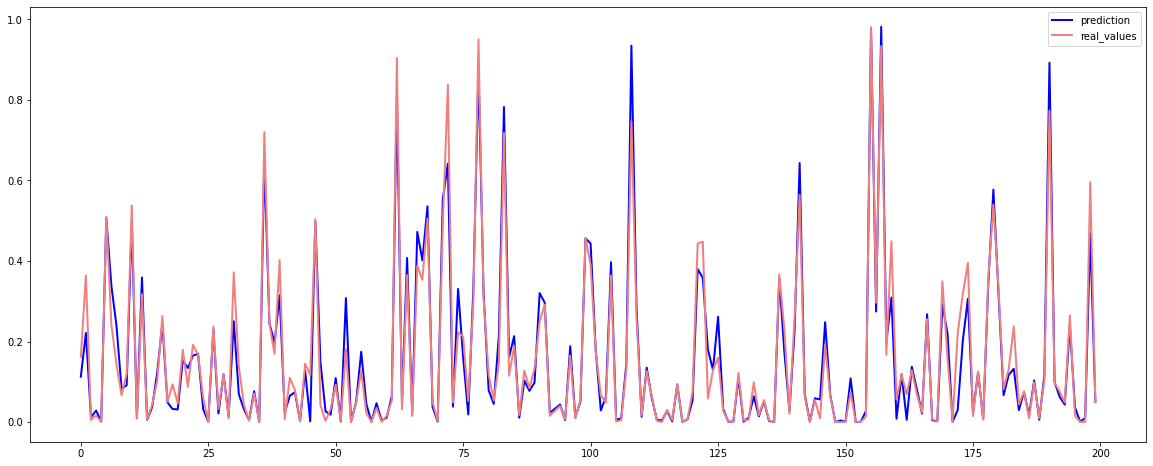

In [ ]:
#visuallizing actual data and predicted data

plt.figure(figsize=(20,8))
plt.plot(knn.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")

plt.show()
     

#XGboost Model
XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient- boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

In [ ]:
#Creating XGboost Model
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
#Checking accuracy of XGboost Model
xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  97.28314112588505


In [ ]:
#predicting sales values using test dataset

y_pred = xgbr.predict(X_test)

In [ ]:
#calculating the Error values for the Linear Regression model with test data vs predicted value

print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.019863883311422855
MSE 0.0012266346907320747
RMSE 0.03502334493922696
R2 0.9728314959830722


#Insight:
In this model we got an accuracy is equal to 97.28%

Mean squared error is 0.001226

Mean absolute error is 0.019863

In [ ]:
#making dataframe out of actual data and predicted data

xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df.to_csv('/content/drive/MyDrive/Final Project/Out1/xgb_real_pred.csv')
xgb_df
     

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.129809
2010-07-09,0.364278,0.325470
2011-07-01,0.005003,0.020637
2012-01-06,0.015856,0.022031
2011-08-26,0.000318,0.000333
...,...,...
2011-01-28,0.169068,0.212251
2010-08-20,0.252860,0.255506
2010-11-26,0.265617,0.355191


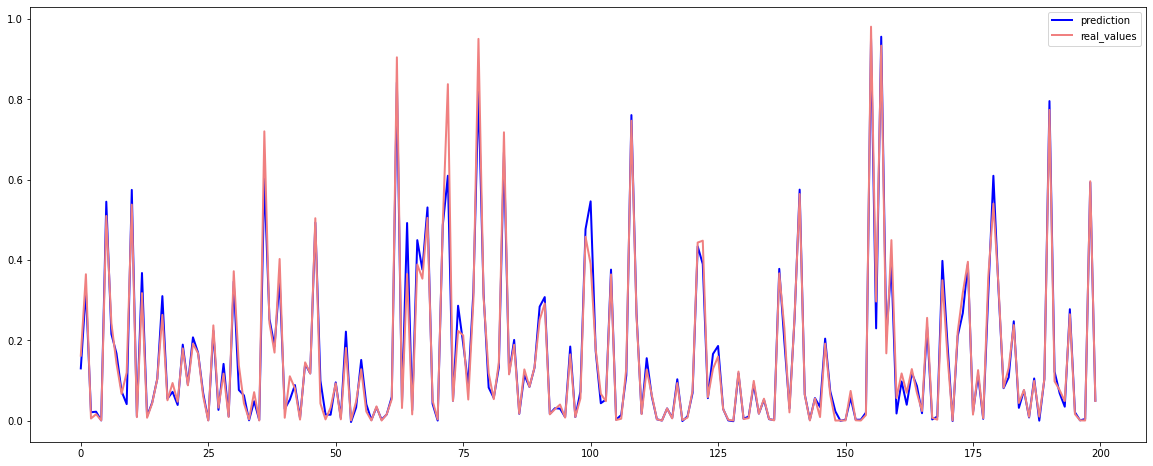

In [ ]:
#visuallizing actual data and predicted data

plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")

plt.show()

#Custom Deep Learning Neural Network
A neural network is a method in artificial intelligence that teaches computers to process data in a way that is inspired by the human brain. It is a type of machine learning process, called deep learning, that uses interconnected nodes or neurons in a layered structure that resembles the human brain.

In [ ]:
## We decalred a function for creating a model.

def create_model():
  ## Keras model object created from Sequential class. This will be the container that contains all layers
  model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.
    
    # Input Layer with 64 Neurons  and Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    
  model.add(Dense(64, input_dim=X_train.shape[1], kernel_initializer='normal',activation='relu'))
  #Hidden layer
  model.add(Dense(32, kernel_initializer='normal'))
  #output Layer
  model.add(Dense(1, kernel_initializer='normal'))

  #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
  model.compile(loss='mean_absolute_error', optimizer='adam')
  return model

In [ ]:
#Defining Custom Deep Learning Neural Network

def create_model():
  model = Sequential()
  model.add(Dense(64, input_dim=X_train.shape[1], kernel_initializer='normal',activation='relu'))
  model.add(Dense(32, kernel_initializer='normal'))
  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(loss='mean_absolute_error', optimizer='adam')
  return model

In [ ]:
#creating Custom Deep Learning Neural Network

estimator_model = KerasRegressor(build_fn=create_model, verbose=1)

<ipython-input-116-63ac975bdc1f>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator_model = KerasRegressor(build_fn=create_model, verbose=1)


In [ ]:
#appling model by splitting data into 20%test and 80%train data and epoch of 100  with taking into consideration 5000 data points
history = estimator_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=5000)

Epoch 1/100
48/48 [==============================] - 2s 15ms/step - loss: 0.4366 - val_loss: 0.1450
Epoch 2/100
48/48 [==============================] - 0s 10ms/step - loss: 0.1960 - val_loss: 0.1540
Epoch 3/100
48/48 [==============================] - 0s 9ms/step - loss: 0.1829 - val_loss: 0.1413
Epoch 4/100
48/48 [==============================] - 0s 9ms/step - loss: 0.1730 - val_loss: 0.1550
Epoch 5/100
48/48 [==============================] - 0s 9ms/step - loss: 0.1385 - val_loss: 0.1598
Epoch 6/100
48/48 [==============================] - 0s 9ms/step - loss: 0.1370 - val_loss: 0.1242
Epoch 7/100
48/48 [==============================] - 0s 10ms/step - loss: 0.2476 - val_loss: 0.1320
Epoch 8/100
48/48 [==============================] - 0s 9ms/step - loss: 0.1895 - val_loss: 0.2317
Epoch 9/100
48/48 [==============================] - 0s 9ms/step - loss: 0.1601 - val_loss: 0.1234
Epoch 10/100
48/48 [==============================] - 0s 9ms/step - loss: 0.1531 - val_loss: 0.1153
Epoch 

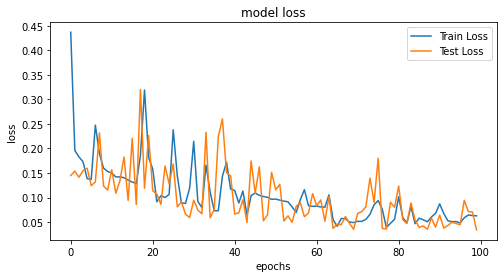

In [ ]:
#visuallizing error value with every epoch

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

plt.show()

#Insight:
loss values lower down with each epoch 

1st epoch: Train loss: 0.4366 - Test val_loss: 0.1450

100th epoch:Train loss: 0.0629 - Test val_loss: 0.0342

In [ ]:
#Checking accuracy of Custom Deep Learning Neural Network

dnn_acc = metrics.r2_score(y_pred, y_test)*100
print("Deep Neural Network accuracy - ",dnn_acc)

Deep Neural Network accuracy -  97.17829113297519


In [ ]:
#predicting sales values using test dataset

y_pred = estimator_model.predict(X_test)

2340/2340 [==============================] - 4s 2ms/step


In [ ]:
#calculating the Error values for the Linear Regression model with test data vs predicted value

print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))
     

MAE 0.034005930661177824
MSE 0.003993838791591234
RMSE 0.0631968258031306
R2 0.9119278490383779


In [ ]:
#making dataframe out of actual data and predicted data

dnn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dnn_df.to_csv('/content/drive/MyDrive/Final Project/Out1/dnn_real_pred.csv')
dnn_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.126051
2010-07-09,0.364278,0.279514
2011-07-01,0.005003,0.036345
2012-01-06,0.015856,0.021035
2011-08-26,0.000318,0.012061
...,...,...
2011-01-28,0.169068,0.219074
2010-08-20,0.252860,0.229875
2010-11-26,0.265617,0.329096


4/4 [==============================] - 0s 3ms/step


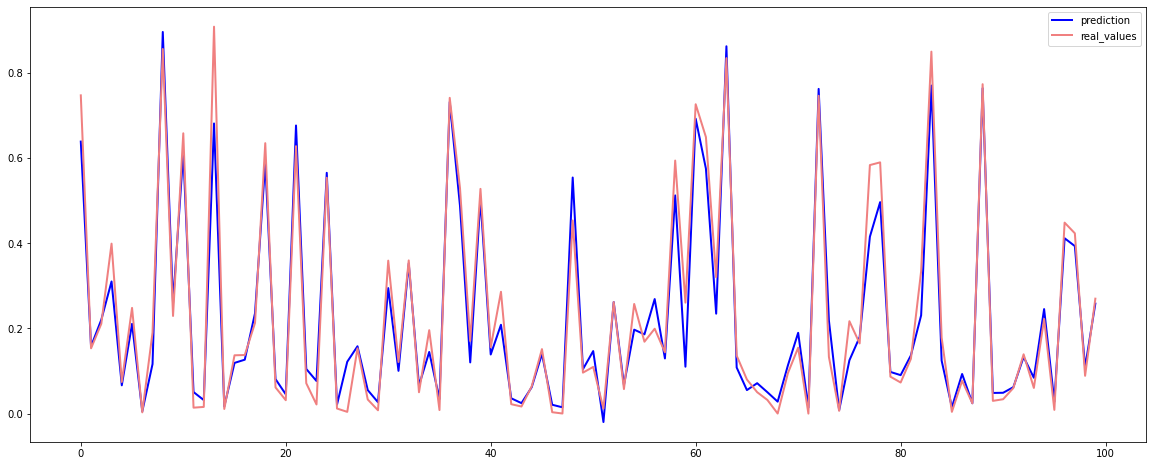

In [ ]:
#visuallizing actual data and predicted data

plt.figure(figsize=(20,8))
plt.plot(estimator_model.predict(X_test[200:300]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[200:300].values, label="real_values", linewidth=2.0,color='lightcoral')

plt.legend(loc="best")

#Comparing Models

In [ ]:
#comparing accuracy of all the models
acc = {'model':['lr_acc','rf_acc','knn_acc','xgb_acc','dnn_acc'],'accuracy':[lr_acc,rf_acc,knn_acc,xgb_acc,dnn_acc]}

In [ ]:
#comparing accuracy of all the models

acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,lr_acc,92.280797
1,rf_acc,97.908881
2,knn_acc,91.972603
3,xgb_acc,97.283141
4,dnn_acc,97.178291


#Model that is giving higest accuracy is Random Forest Regressor Model with accuracy of 97.908881

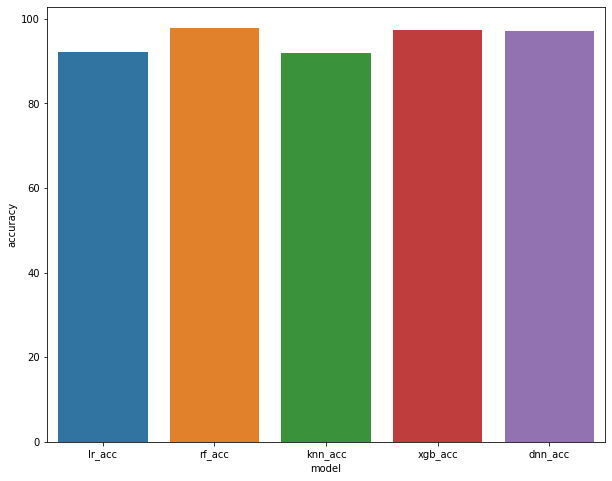

In [ ]:
#comparing accuracy of all the models

plt.figure(figsize=(10,8))
sns.barplot(x='model',y='accuracy',data=acc_df)
plt.show()